In [1]:
# import visualizing tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 99

In [2]:
# read data
train_df = pd.read_csv(r'C:\Users\samee\Google Drive\College\COMP 562\Final Project\house-prices-advanced-regression-techniques\train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# view how many fields are present
train_df.shape

(1460, 81)

In [4]:
#read test data
test_df = pd.read_csv('https://raw.githubusercontent.com/hybrezz54/comp562-final-proj/master/data/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# features present in the data
# info on features can be found in the github repo
# TODO: remove columns with a lot of missing data
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# see which columns contain mostly missing data
train_df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [8]:
# see which columns are numerical and categorical
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
(train_df.isnull().sum().sort_values(ascending=False)/1460)[0:10]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
dtype: float64

In [10]:
# drop columns that are missing more than 10% of training data
new_train_df = train_df.dropna(axis='columns', thresh=train_df.shape[0]*0.9)
(new_train_df.isnull().sum().sort_values(ascending=False)/new_train_df.shape[0])[0:10]

GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageCond      0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
dtype: float64

In [11]:
# drop columns that are missing more than 10% of test data
new_test_df = test_df.dropna(axis='columns', thresh=test_df.shape[0]*0.9)
(new_test_df.isnull().sum().sort_values(ascending=False)/new_test_df.shape[0])[0:10]

GarageYrBlt     0.053461
GarageFinish    0.053461
GarageCond      0.053461
GarageQual      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
dtype: float64

In [12]:
# find all categories for nonnumerical data
from pandas.api.types import is_object_dtype
for (colName, colData) in new_train_df.iteritems():
    if is_object_dtype(colData):
        print(colName, ' categories: ', colData.astype("category").cat.categories)

MSZoning  categories:  Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')
Street  categories:  Index(['Grvl', 'Pave'], dtype='object')
LotShape  categories:  Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')
LandContour  categories:  Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object')
Utilities  categories:  Index(['AllPub', 'NoSeWa'], dtype='object')
LotConfig  categories:  Index(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='object')
LandSlope  categories:  Index(['Gtl', 'Mod', 'Sev'], dtype='object')
Neighborhood  categories:  Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')
Condition1  categories:  Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'],
      dtype='ob

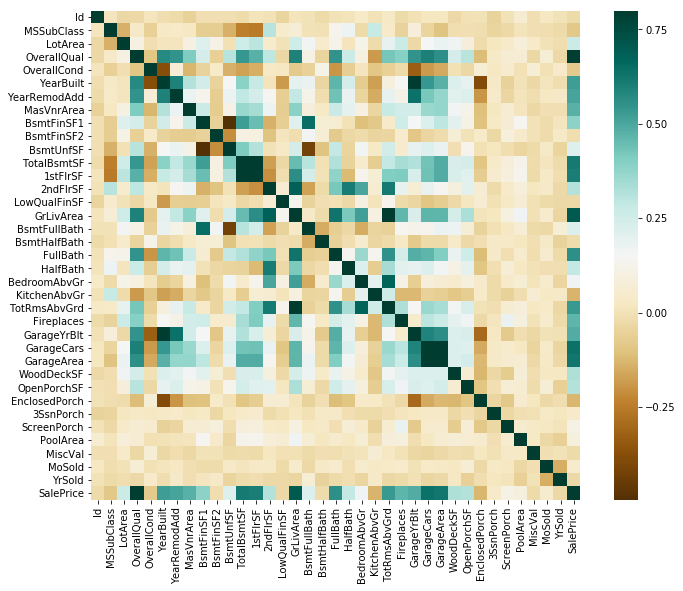

In [13]:
# correlation matrix
corrmat = new_train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='BrBG')

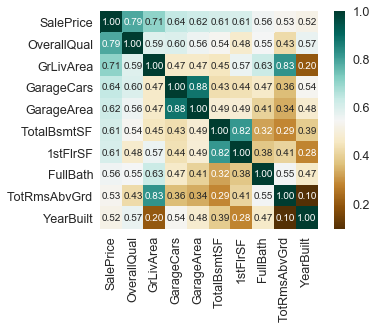

In [14]:
# saleprice correlation matrix with top 10 correlated features
import numpy as np
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(new_train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="BrBG", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sns.pairplot(data=new_train_df)

In [15]:
# fill NA or missing values in data
from pandas.api.types import is_numeric_dtype
for (colName, colData) in new_train_df.iteritems():
    if is_numeric_dtype(colData):
        new_train_df[colName] = colData.fillna(colData.median())
    else:
        new_train_df[colName] = colData.fillna('Missing')
        
# verify no missing values left
(new_train_df.isnull().sum().sort_values(ascending=False)/new_train_df.shape[0])[:10]

C:\Users\samee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\samee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
dtype: float64

In [16]:
# create new feature to represent total square feet of house
new_train_df['TotalSF'] = new_train_df['TotalBsmtSF'] + new_train_df['GrLivArea']

# drop unneeded columns esp those that are redundant
# drop GarageArea bc colinear w GarageCars and has lower correlation; same w 1stFlrSF and TotalBsmtSF
# drop GrLivArea and TotalBsmtSF because TotalSF has a higher correlation (0.78) than both of them
new_train_df.drop(['GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

C:\Users\samee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\samee\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


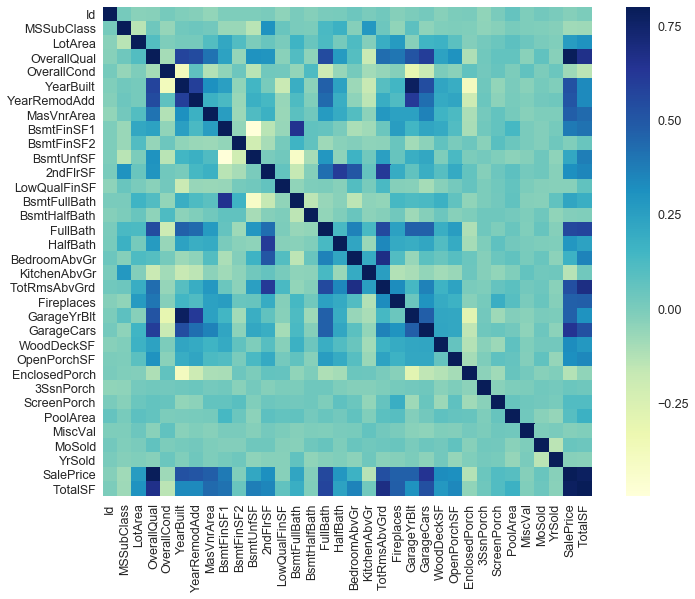

In [17]:
# correlation matrix
corrmat = new_train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="YlGnBu", vmax=.8, square=True);

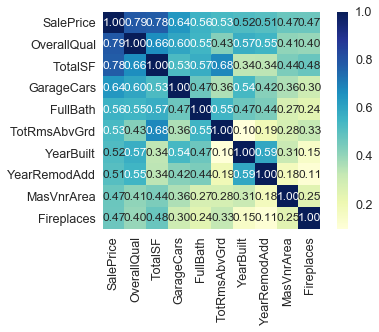

In [18]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(new_train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [19]:
# standardize only numerical features first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfs = []
final_train_df = new_train_df.copy()
for (colName, colData) in final_train_df.iteritems():
    if is_numeric_dtype(colData) and colName != 'Id':
        dfs.append(pd.DataFrame(scaler.fit_transform(final_train_df[[colName]]), columns=[colName]))
        final_train_df.drop([colName], axis=1, inplace=True)

dfs.insert(0, final_train_df)
final_train_df = pd.concat(dfs, axis=1, sort=True)
final_train_df.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,-0.008372
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,-0.059386
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,0.161672
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,-0.121330
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843,0.935372


In [20]:
# one hot encode all the categorial vars. Basically create dummy variables and create a 1, and 0 if they exist or not.
final_train_df = pd.get_dummies(new_train_df.drop(['Id'], axis=1))
final_train_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [21]:
# read testing data
test_df = pd.read_csv('https://raw.githubusercontent.com/hybrezz54/comp562-final-proj/master/data/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [22]:
# preprocess the testing data
# drop cols with more than 10% missing data
# final_test_df = test_df.dropna(axis='columns', thresh=test_df.shape[0]*0.9)
final_test_df = test_df.drop(['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage'], axis='columns')

# fill NA or missing values in data
for (colName, colData) in final_test_df.iteritems():
    if is_numeric_dtype(colData):
        final_test_df[colName] = colData.fillna(colData.median())
    else:
        final_test_df[colName] = colData.fillna('Missing')
        
# create new feature to represent total square feet of house
final_test_df['TotalSF'] = final_test_df['TotalBsmtSF'] + final_test_df['GrLivArea']

# drop unneeded columns esp those that are redundant
final_test_df.drop(['GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# standardize only numerical features first
dfs = []
for (colName, colData) in final_test_df.iteritems():
    if is_numeric_dtype(colData) and colName != 'Id':
        dfs.append(pd.DataFrame(scaler.fit_transform(final_test_df[[colName]]), columns=[colName]))
        final_test_df.drop([colName], axis=1, inplace=True)

dfs.insert(0, final_test_df)
final_test_df = pd.concat(dfs, axis=1, sort=True)

# one hot encode all the categorial vars
final_test_df = pd.get_dummies(final_test_df.drop(['Id'], axis=1))
final_test_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874711,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,-0.650461,...,0,0,0,1,0,0,0,0,1,0
1,-0.874711,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,-0.339225,...,0,0,0,1,0,0,0,0,1,0
2,0.061351,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,-0.954831,...,0,0,0,1,0,0,0,0,1,0
3,0.061351,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,-0.526882,...,0,0,0,1,0,0,0,0,1,0
4,1.465443,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,1.059048,...,0,0,0,1,0,0,0,0,1,0


In [23]:
# print cols present in train data and not present in test data
missing_test_cols = list(set(final_train_df.columns.values).difference(set(final_test_df.columns.values)))
missing_test_cols

['Heating_Floor',
 'Electrical_Missing',
 'RoofMatl_Metal',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Exterior1st_Stone',
 'SalePrice',
 'Exterior1st_ImStucc',
 'Condition2_RRNn',
 'RoofMatl_ClyTile',
 'Heating_OthW',
 'Exterior2nd_Other',
 'RoofMatl_Membran',
 'Utilities_NoSeWa',
 'Electrical_Mix',
 'HouseStyle_2.5Fin',
 'RoofMatl_Roll',
 'GarageQual_Ex']

In [24]:
# print cols present in test data and not present in train data
missing_train_cols = list(set(final_test_df.columns.values).difference(set(final_train_df.columns.values)))
missing_train_cols

['Functional_Missing',
 'Exterior1st_Missing',
 'MSZoning_Missing',
 'Utilities_Missing',
 'KitchenQual_Missing',
 'Exterior2nd_Missing',
 'SaleType_Missing']

In [25]:
# add cols present in train and not in test
for col in missing_test_cols:
    final_test_df[col] = '0'
    
# drop cols present in test and not in train
final_test_df.drop(missing_train_cols, axis=1, inplace=True)
final_test_df.drop(['SalePrice'], axis=1, inplace=True)

# verify shape is same except for SalePrice col
print(final_train_df.shape)
print(final_test_df.shape)

(1460, 278)
(1459, 277)


In [26]:
# run regression models
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']])
predictions = lin_regr.predict(final_test_df)

# The coefficients
# print('Coefficients: \n', lin_regr.coef_)

# print first ten predictions
predictions[0:10]

array([[-324838.83913859],
       [-335926.01449806],
       [-368992.59649292],
       [-350493.33125977],
       [ -30676.79490051],
       [-287490.29182197],
       [-263264.70698266],
       [-360835.1090492 ],
       [-282580.91355999],
       [-253666.74880342]])

In [27]:
# perform 6-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(lin_regr, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
scores

array([0.88779435, 0.89555727, 0.82114421, 0.74748082, 0.88199316,
       0.51806822])

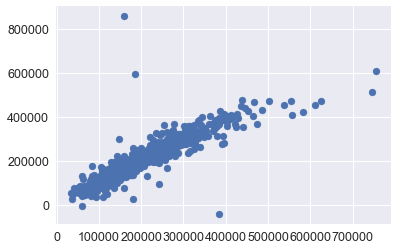

In [28]:
# Make cross validated predictions
predictions = cross_val_predict(lin_regr, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(final_train_df[['SalePrice']], predictions)

In [29]:
# get accuracy of model from cross validation
accuracy = metrics.r2_score(final_train_df[['SalePrice']], predictions)
accuracy

0.8021799607635589

<h3>We will try to attack the classification problem using Ridge Regression and LASSO. We'll use some of the pre-processing and feature engineering we have already done.</h3>

In [30]:
# preprocess the testing and training data, using previous feature engineering we did.
# drop cols with more than 10% missing data
# final_test_df = test_df.dropna(axis='columns', thresh=test_df.shape[0]*0.9)
final_test_df = test_df.drop(['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage'], axis='columns')

# fill NA or missing values in data
for (colName, colData) in final_test_df.iteritems():
    if is_numeric_dtype(colData):
        final_test_df[colName] = colData.fillna(colData.median())
    else:
        final_test_df[colName] = colData.fillna('Missing')
        
# create new feature to represent total square feet of house
final_test_df['TotalSF'] = final_test_df['TotalBsmtSF'] + final_test_df['GrLivArea']

# drop unneeded columns esp those that are redundant
final_test_df.drop(['GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

final_test_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,1778.0
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,2658.0
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,2557.0
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,2530.0
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,2560.0


In [32]:
final_train_df = train_df.drop(['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage'], axis='columns')

# fill NA or missing values in data
for (colName, colData) in final_train_df.iteritems():
    if is_numeric_dtype(colData):
        final_train_df[colName] = colData.fillna(colData.median())
    else:
        final_train_df[colName] = colData.fillna('Missing')
        
# create new feature to represent total square feet of house
final_train_df['TotalSF'] = final_train_df['TotalBsmtSF'] + final_train_df['GrLivArea']

# drop unneeded columns esp those that are redundant
final_train_df.drop(['GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

final_train_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,3343


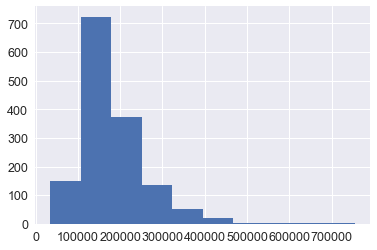

In [33]:
final_train_df['SalePrice'].hist()

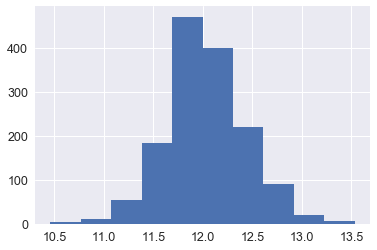

In [34]:
np.log1p(final_train_df['SalePrice']).hist() #aiming for nomality.

In [35]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [36]:
#We have both the testing and training datasets using the previous feature engineering.
#We will implement a log transform to eliminate skewness in variables that are not normal.

#transform the target variable
final_train_df['SalePrice'] = np.log1p(final_train_df['SalePrice'])

#log transform the skewed numeric features, doing the training dataset first.
numeric_feats = final_train_df.dtypes[final_train_df.dtypes != "object"].index

skewed_feats = final_train_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.6] #if skewness is greater than .6, then it's skewed
skewed_feats = skewed_feats.index

final_train_df[skewed_feats] = np.log1p(final_train_df[skewed_feats]) #calculate for the skewed for features > .75

In [37]:
#do the transformation of the test data

#log transform the skewed numeric features, doing the training dataset first.
numeric_feats = final_test_df.dtypes[final_test_df.dtypes != "object"].index

skewed_feats = final_test_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.6] #if skewness is greater than .6, then it's skewed
skewed_feats = skewed_feats.index

final_test_df[skewed_feats] = np.log1p(final_test_df[skewed_feats]) #calculate for the skewed for features > .75

In [38]:
# get the dummy variables for the categorical variables
final_train_df = pd.get_dummies(final_train_df)
final_test_df = pd.get_dummies(final_test_df)

In [39]:
final_test_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,3.044522,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
1,1462,3.044522,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,1463,4.110874,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,1464,4.110874,9.208238,6,6,1998,1998,3.044522,6.401917,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,1465,4.795791,8.518392,8,5,1992,1992,0.000000,5.575949,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [40]:
#creating matrices for sklearn:
X_train = final_train_df.drop(['SalePrice'], axis=1)
X_test = final_test_df
y = final_train_df.SalePrice

In [41]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 6))
    return(rmse)

In [42]:
model_ridge = Ridge()

In [66]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30] #we're testing different values of alpha

cv_ridge = [rmse_cv(Ridge(alpha = i)).mean() 
            for i in alphas]

In [113]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge

0.05     0.134385
0.10     0.133572
0.30     0.131503
1.00     0.128741
3.00     0.126937
5.00     0.126672
10.00    0.127312
15.00    0.128379
30.00    0.131510
dtype: float64

In [114]:
cv_ridge.min() #we see that the alpha value here is 5 that gives us the lowest alpha error

0.12667224873878621

In [115]:
#Now we're going to test LASSO. LASSO has the freedom to choose it's own predictors.
#So from the predictors we have let's see what it will use.
lasso_model = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [116]:
rmse_cv(lasso_model).mean()

0.12363222833761948

In [117]:
coef = pd.Series(lasso_model.coef_, index = X_train.columns)

In [118]:
#using this function we'll see which values lasso did and did not pick
print("Lasso used " + str(sum(coef != 0)) + " variables and eliminated " +  str(sum(coef == 0)) + " variables")

Lasso used 111 variables and eliminated 167 variables


In [119]:
top_bottom_coefficients = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

#let's just take a look at the top 10 of the coefficients, and the bottom 10 of the coefficients.

In [120]:
import matplotlib

Text(0.5,1,'The coeffiecients used in the lasso model')

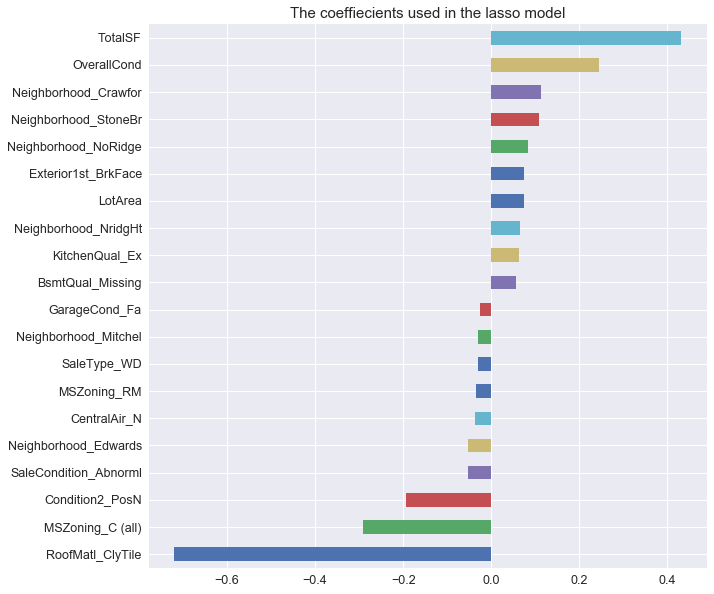

In [121]:
plt.figure.figsize = (10.0, 10)

top_bottom_coefficients.plot(kind = "barh")
plt.title("The coeffiecients used in the lasso model")

#we can see here that TotalSquareFeet is extremely important.

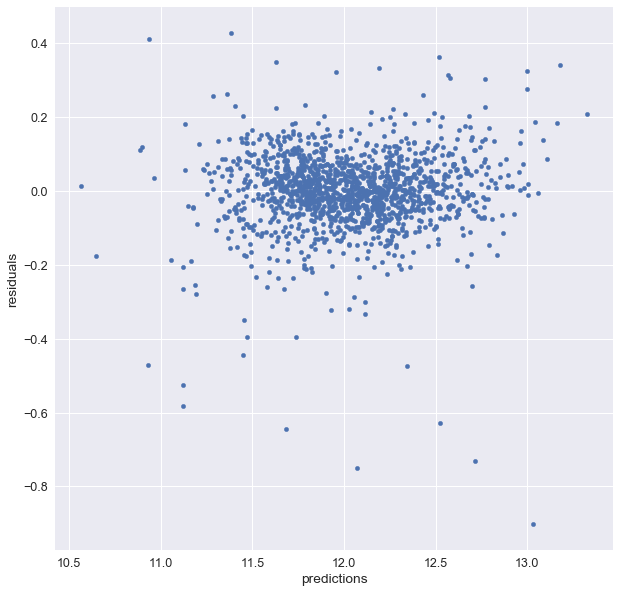

In [122]:
#lets analyze the residuals and the residuals look scattered and there's no pattern to them. Thats a good thing.
#Suggests normality.
plt.figure.figsize = (10,10)

predictions = pd.DataFrame({"predictions":lasso_model.predict(X_train), "true":y})
predictions["residuals"] = predictions["true"] - predictions["predictions"]
predictions.plot(x = "predictions", y = "residuals",kind = "scatter")